In [4]:
import numpy as np
from tqdm import tqdm
import pymc3 as pm
import matplotlib.pyplot as plt
from matplotlib import colors
import time
from numba import jit

# Metropolis Ising

This is my metropolis python implementation for a square ising lattice (numpy array).

It uses numba and can run at over 20,000,000 iterations/second, allowing large systems to converge within minutes.

In [1]:
def mcmc_ising(n = 200,
               nsteps = 20000000,
               T = 1,
               J = 1,
               H = 0):
    """
    Metropolis MCMC algorithm on the square 2D Ising lattice, extremely fast
    
    Inputs:
        n = size of the ising array, always square
        nsteps = amount of MCMC steps
        T = Temperature of the system (kT)
        J = The constant outside of hamiltonian
        H = Outside field
        
    Outputs:
        ising_calculation(ising_lattice) = The 2D ising array
        nsteps = amount of MCMC steps
        T = Temperature of the system (kT)
        
    Requirements:
        NumPy (import numpy as np)
        Numba jit (from numba import jit)
    """

    # initialize our lattice
    ising_lattice = np.random.choice([1, -1], size=(n, n))

    # From here on down we are in numba jit
    @jit(nopython=True)
    def ising_calculation(lattice):
        lattice = lattice

        for step in range(nsteps):

            i = np.random.randint(n)
            j = np.random.randint(n)

            # Boundary conditions and neighbours
            Sn = lattice[(i - 1) % n, j] + lattice[(i + 1) % n, j] + \
                 lattice[i, (j - 1) % n] + lattice[i, (j + 1) % n]
            dE = 2 * lattice[i, j] * (H + J * Sn)

            if dE < 0 or np.random.random() < np.exp(-dE/(T)):
                lattice[i, j] = -lattice[i, j]

        return lattice
    
    return ising_calculation(ising_lattice), nsteps, T

In [2]:
def plot_ising_array(ising_system, save_plot = False, file_name = "ising_array"):
    """
    Creates a plot of a 2D numpy array with binary values and can save to users drive
    
    Inputs:
        ising_system = 2D Array of binary values (ising lattice)
        save_plot = Whether to save the plot to drive
        file_name = String of file name, will be saved as a png
    
    Outputs:
        prints a matplotlib plot
        if save_plot = True, will save a plot with file name file_name
    
    Requirements:
        matplotlib pyplot (import matplotlib.pyplot as plt)
        matplotlib colors (from matplotlib import colors)
    """
    
    import matplotlib.pyplot as plt
    from matplotlib import colors
    
    ising_system, nsteps, T = ising_system

    plt.figure(figsize=(7,7))
    plt.imshow(ising_system, cmap = colors.ListedColormap(['white', '#0550c6']))
    
    # Math for the correct position of the text
    x_pos = len(ising_system) * 1.05
    y_pos = len(ising_system) * 0.05
    
    # Title of the model
    title = "2D Ising Model " + str(len(ising_system)) +  "x" + str(len(ising_system))
    plt.text(x_pos, y_pos, title, bbox=dict(facecolor='red', alpha=0.2), size = 12)
    
    # Magnetization text
    magnetization = "Magnetization: " + str(round(abs(np.sum(ising_system))/(len(ising_system)**2)*100,2)) + "%"
    plt.text(x_pos, y_pos*3, magnetization, size = 12)
    
    # Metropolis steps text
    steps_text = "MCMC Steps: " + str(f"{nsteps:,}")
    plt.text(x_pos, y_pos*4, steps_text, size = 12)
    
    # Temperature text
    temp_text = "System Temp: " + str(T)
    plt.text(x_pos, y_pos*5, temp_text, size = 12)
    
    # Saving the plot if user selected True, as well as reformating filename
    if save_plot:
        file_name += ".png"
        plt.savefig(file_name, bbox_inches='tight', quality = 95)
    
    plt.show()
    
#plot_ising_array(mcmc_ising(n = 200, T = 1, nsteps = 2000000), save_plot = False)

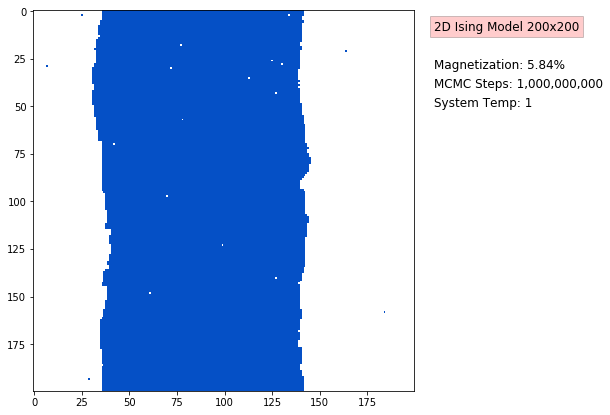

In [36]:
plot_ising_array(mcmc_ising(n = 200, T = 1, nsteps = 1000000000), save_plot = False)